## Exploratory Data Analysis 

The data set we will be contains information on 303,748 flights that departed from NYC airports in 2017.  An overview of the data attributes is provided below.

| Data Set Attribute  | Description 
|:--------------------|:----------------------------------------------------------------------------- |
|__Year__             |Year in which the flight occured                                                                   | 
|__Month__            |Month in which the flight occured (1 - January ... 12 - December)                      |
|__Day__      |Date on which the flight occured (1 - first day of month, 2 - second day of month,....)                                             |
|__Dep_Time/Arr_Time__   |Actual departure and arrival times (local timezone)                                    |
|__Sched_Dep_Time/Sched_Arr_Time__        |Scheduled departure and arrival times (local timezone)                                      |
|__Dep_Delay/Arr_Delay__     |Departure and arrival delays (in minutes; Negative times represent early departures/arrivals)                                |
|__Hour/Minute__         |Time of scheduled departure (broken into hour and minutes)
|__Carrier__ |Two letter carrier abbreviation                                   |
|__Flight__|Flight Number                             |
|__Origin/Dest__           |Three letter abbreviation for origin and destination airport of flight                                                  |
|__Air_Time__                |Amount of time spent in the air (in minutes)                                                             |
|__Distance__         |Distance between airports (in miles)                                                 |
|__Time_Hour__           |Scheduled date and hour of the flight combined                                               

In [211]:
#import pyreader library
import pyreadr

#read rda file into python
result = pyreadr.read_r('/users/marleegoodman/Downloads/flights.rda')

#'result' above has key of 'flights' and value of data
#convert values into a list
listing=list(result.values())

#index values to get dataframe
df=listing[0]

In [212]:
#show partial df
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2017,10,1,27,2114,193.0,317,15,182.0,UA,1537,N54711,EWR,MIA,148.0,1085.0,21.0,14.0,2017-10-01 21:00:00
1,2017,10,1,519,525,-6.0,741,759,-18.0,UA,1161,N37287,EWR,IAH,183.0,1400.0,5.0,25.0,2017-10-01 05:00:00
2,2017,10,1,544,545,-1.0,815,819,-4.0,B6,27,N547JB,EWR,MCO,133.0,937.0,5.0,45.0,2017-10-01 05:00:00
3,2017,10,1,546,550,-4.0,702,719,-17.0,UA,761,N38446,LGA,ORD,108.0,733.0,5.0,50.0,2017-10-01 05:00:00
4,2017,10,1,552,600,-8.0,846,850,-4.0,NK,521,N675NK,EWR,FLL,156.0,1065.0,6.0,0.0,2017-10-01 06:00:00


In [213]:
#checking dataset shape
df.shape

(303748, 19)

There are 19 attributes and 303,748 flight cases in the data set. 

In [214]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303748 entries, 0 to 303747
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            303748 non-null  int32         
 1   month           303748 non-null  int32         
 2   day             303748 non-null  int32         
 3   dep_time        295938 non-null  object        
 4   sched_dep_time  303748 non-null  int32         
 5   dep_delay       295934 non-null  float64       
 6   arr_time        295600 non-null  object        
 7   sched_arr_time  303748 non-null  int32         
 8   arr_delay       294896 non-null  float64       
 9   carrier         303748 non-null  object        
 10  flight          303748 non-null  int32         
 11  tailnum         302757 non-null  object        
 12  origin          303748 non-null  object        
 13  dest            303748 non-null  object        
 14  air_time        294896 non-null  flo

The attributes are a mix of integers, floats, and objects, with one datetime.  The number of non-null values in each attribute can be seen here as well.

In [215]:
#getting exact number of null values in each column
null_count = df.isnull().sum()

# get percent of missing data
missing = df.isnull().mean() * 100

#creating a dictionary with the count of null and negative values
d = {'# Missing':null_count,'% of Total':missing}

#import pandas
import pandas as pd

pd.DataFrame(d)

,# Missing,% of Total
year,0,0.000000
month,0,0.000000
day,0,0.000000
dep_time,7810,2.571210
sched_dep_time,0,0.000000
dep_delay,7814,2.572527
arr_time,8148,2.682487
sched_arr_time,0,0.000000
arr_delay,8852,2.914258
carrier,0,0.000000


There are six columns that contain null values, with Arrival Delay and Air Time each having the most nulls at 8,852. The two nulls combined make up nearly 6% of the total records.

In [216]:
# descriptive stats
df.describe()

,year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,303748.0,303748.000000,303748.000000,303748.000000,295934.000000,303748.000000,294896.000000,303748.000000,294896.000000,303748.000000,303748.000000,303748.000000
mean,2017.0,6.529363,15.763758,1346.816568,15.187424,1523.343986,7.104023,1698.710668,164.489427,1154.050051,13.202415,26.575118
std,0.0,3.407936,8.775245,478.461684,52.040383,531.782440,55.323259,1461.222263,97.872896,760.439813,4.757648,19.569856
min,2017.0,1.000000,1.000000,111.000000,-84.000000,1.000000,-98.000000,1.000000,20.000000,93.000000,1.000000,0.000000
25%,2017.0,4.000000,8.000000,910.000000,-6.000000,1119.000000,-20.000000,519.000000,99.000000,636.000000,9.000000,7.000000
50%,2017.0,7.000000,16.000000,1350.000000,-2.000000,1540.000000,-7.000000,1345.000000,139.000000,1005.000000,13.000000,29.000000
75%,2017.0,9.000000,23.000000,1745.000000,12.000000,1954.000000,13.000000,2238.000000,211.000000,1598.000000,17.000000,45.000000
max,2017.0,12.000000,31.000000,2359.000000,1548.000000,2359.000000,1589.000000,6988.000000,712.000000,4983.000000,23.000000,59.000000


According to this initial descriptive statistics, we can see again the columns that have null values. Other than that, for now, all seems to make sense. Arrival Delay and Departure Delay both have negative values to indicate being ahead of schedule. We will take a look closer at each attribute to understand them better.

### Analyzing Each Attribute Individually

#### 1. Year

In [217]:
#summary statistics
df['year'].describe()

count    303748.0
mean       2017.0
std           0.0
min        2017.0
25%        2017.0
50%        2017.0
75%        2017.0
max        2017.0
Name: year, dtype: float64

There are no nulls in the year column. The only year present is 2017.

#### 2. Month

In [218]:
#summary statistics
df['month'].describe()

count    303748.000000
mean          6.529363
std           3.407936
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64

The month column does not have any null values. 

It is not useful to view the summary statistics this way, as month is an ordinal but categorical variable. We will count the frequency of each month in the data set instead.

In [219]:
#count values
df['month'].value_counts()

8     27325
3     26530
7     26319
5     26089
6     25980
10    25694
4     25260
12    25098
1     24425
11    24362
9     24234
2     22432
Name: month, dtype: int64

August occurs the most in this data set, but the other months are not far behind in their frequencies. To visualize this, we will plot the frequencies. 

In [220]:
#import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

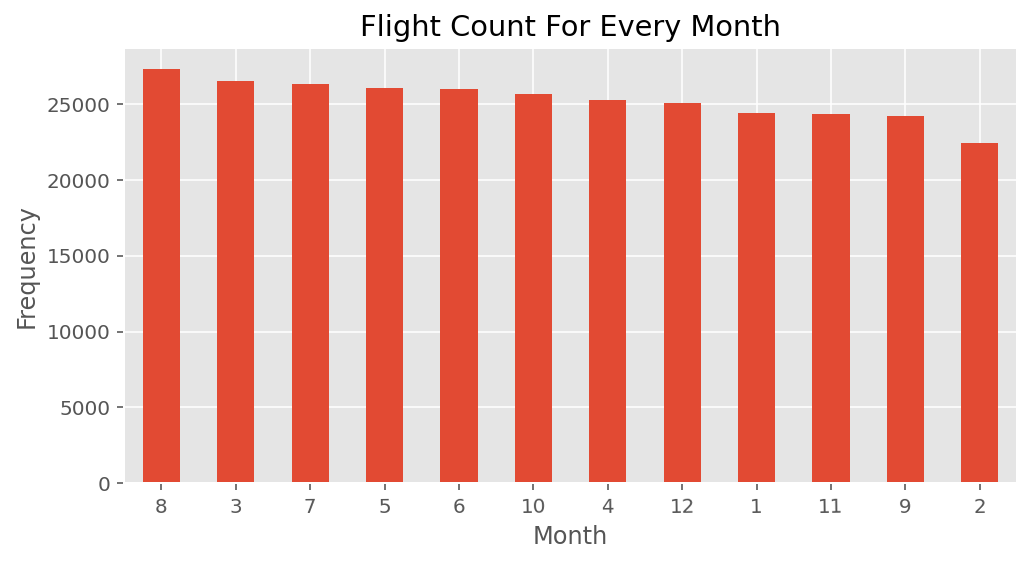

In [260]:
#counting the frequecies
count=df['month'].value_counts()
#plot in a bar chart
#give it a title
count.plot.bar(title='Flight Count For Every Month')
#assign axis labels
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(rotation=1, horizontalalignment="center")

#### 3. Day

In [261]:
#summary statistics
df['day'].describe()

count    303748.000000
mean         15.763758
std           8.775245
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: day, dtype: float64

The day column does not have any null values. 

It is not useful to view the summary statistics this way, as day is an ordinal but categorical variable. We will count the frequency of each day and graph the results.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

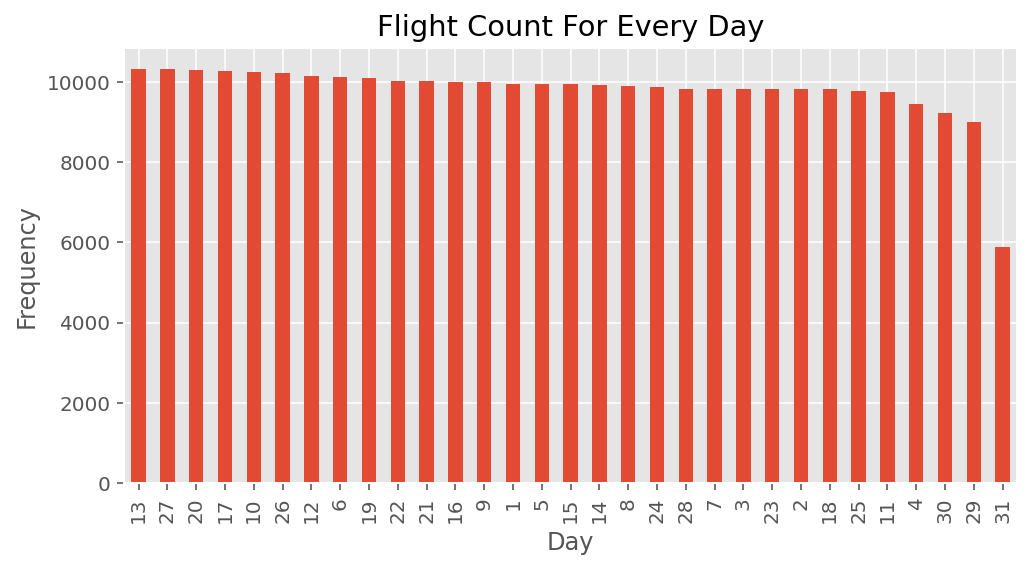

In [262]:
#counting the frequecies
count_day=df['day'].value_counts()
#plot in a bar chart
#give it a title
count_day.plot.bar(title='Flight Count For Every Day')
#assign axis labels
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Every day of the month has about the same frequency, except for the 31st (which is most likely due to the fact that not every month has a 31st day).

#### 4. Departure Time

In [263]:
#summary statistics
df['dep_time'].describe()

count     295938
unique      1385
top          555
freq         921
Name: dep_time, dtype: int64

In [264]:
#find amount of nulls ('True values')
df['dep_time'].isna().value_counts()

False    295938
True       7810
Name: dep_time, dtype: int64

There are 7,810 values missing from the actual departure time column. It is odd that not all flights would have records of when they actually took off. Of the non-nulls, there are 1,385 unique departure times. The most frequent time is 5:55 AM at 921 occurrences. 

Time is an ordinal, catergorical variable so we will use a bar graph to visualize the attribute. Because there are 1,385 unique departure times, we will just graph the top 30 most frequent times.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

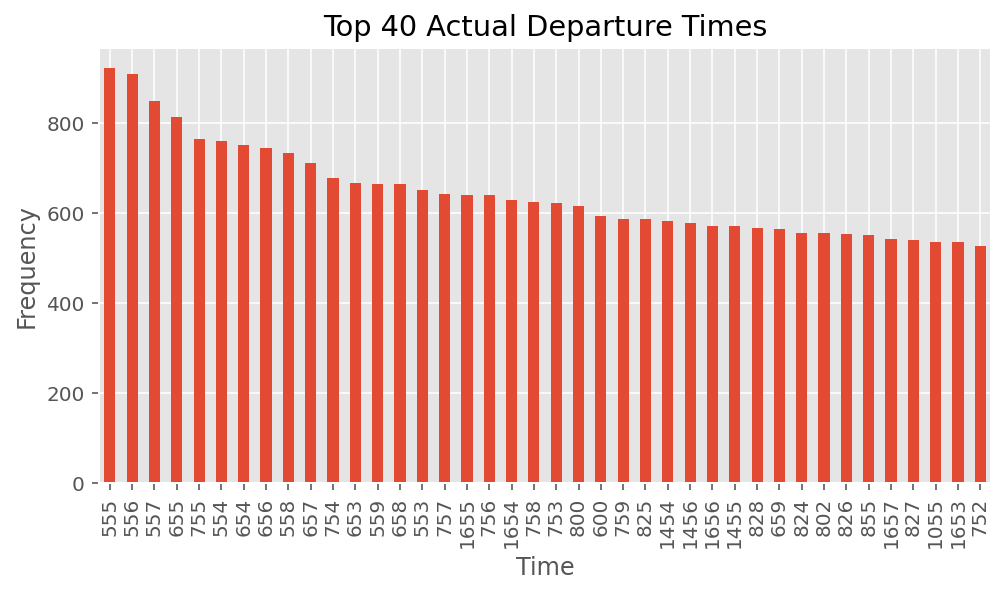

In [265]:
deptime=df['dep_time'].value_counts().head(40)
#plot in a chart
#give it a title
deptime.plot.bar(title='Top 40 Actual Departure Times')
#assign axis labels
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

The top 15 most frequent actual departure times fall between 5:00 AM and 8:00 AM.

#### 5. Scheduled Departure Time

In [266]:
#summary statistics
df['sched_dep_time'].describe()

count    303748.000000
mean       1346.816568
std         478.461684
min         111.000000
25%         910.000000
50%        1350.000000
75%        1745.000000
max        2359.000000
Name: sched_dep_time, dtype: float64

There are no nulls in the scheduled departure time column. The minimum scheduled departure time is 1:11 AM. The maximum time is 11:59 PM. 

The data type is a float but the variable 'time' is ordinal categorical, so we will count the values.

In [267]:
#count values
df['sched_dep_time'].value_counts()

600     7464
700     6235
1100    4041
800     3903
900     3420
        ... 
1334       1
553        1
2218       1
1628       1
2144       1
Name: sched_dep_time, Length: 1037, dtype: int64

There are 1,037 unique scheduled departure times. The most frequent scheduled departure time is 6:00 AM at 7,464 occurences. We will graph the highest frequencies. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

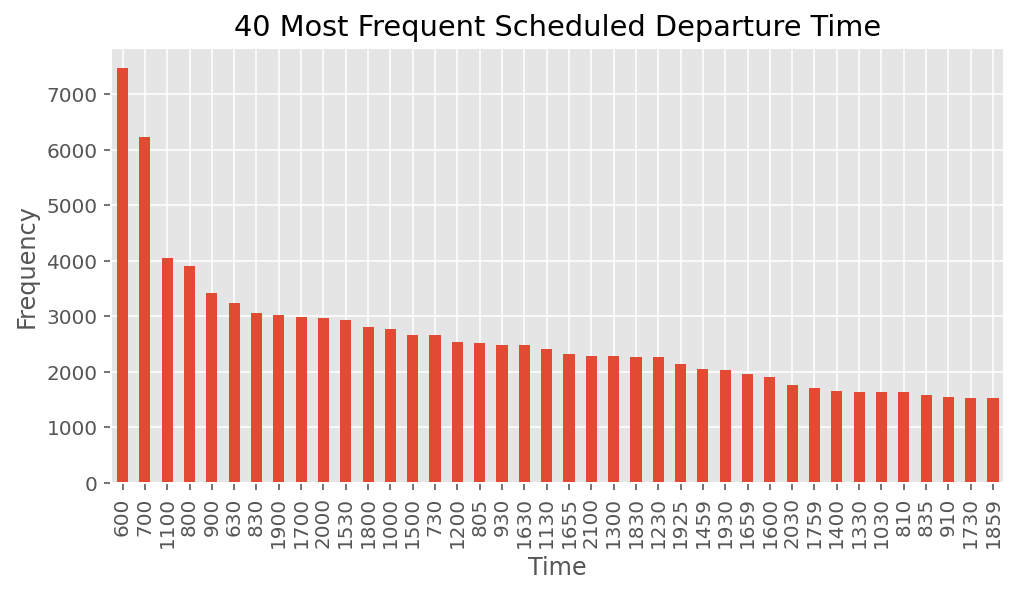

In [268]:
sched_deptime=df['sched_dep_time'].value_counts().head(40)
#plot in a chart
#give it a title
sched_deptime.plot.bar(title='40 Most Frequent Scheduled Departure Time')
#assign axis labels
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

The most common scheduled departure time is 6:00 AM. At the eighth most common time, we see a time past noon (7:00 PM). 6:00 AM and 7:00 AM occur far more often that any other time. 

#### 6. Actual Arrival Time

In [269]:
#summary statistics
df['arr_time'].describe()

count     295600
unique      1434
top         1009
freq         440
Name: arr_time, dtype: int64

In [270]:
#count nulls ('True' values)
df['arr_time'].isna().value_counts()

False    295600
True       8148
Name: arr_time, dtype: int64

There are 8,148 null values in the actual arrival time column. It is odd that not every flight has the exact time they touch down on the pavement. 

From the non null values, there are 1,434 unique actual arrival times, the most common one being 10:09 AM at 440 occurences. 10:09 AM is oddly specific for 440 planes to have as arrival times, but 440 is only a small percentage of the total amount of flights. 

We will graph the other most frequent actual arrival times as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

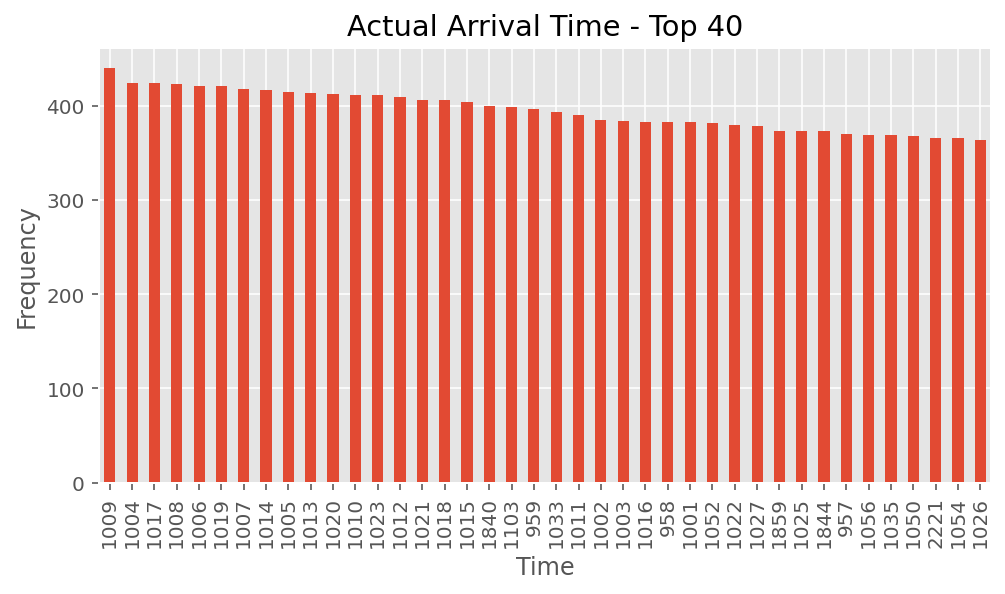

In [271]:
arr_time=df['arr_time'].value_counts().head(40)
#plot in a chart
#give it a title
arr_time.plot.bar(title='Actual Arrival Time - Top 40')
#assign axis labels
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Of the top 40 actual arrival times, most are in the 10:00 AM hour. 

The frequencies of top 40 times are relatively similar to eachother.  

#### 7. Scheduled Arrival Time

In [272]:
#summary statistics
df['sched_arr_time'].describe()

count    303748.000000
mean       1523.343986
std         531.782440
min           1.000000
25%        1119.000000
50%        1540.000000
75%        1954.000000
max        2359.000000
Name: sched_arr_time, dtype: float64

In [273]:
#count values
df['sched_arr_time'].value_counts()

1025    1171
1340     943
1825     909
1915     904
1020     886
        ... 
108        1
340        1
154        1
148        1
327        1
Name: sched_arr_time, Length: 1196, dtype: int64

There are no null values in the scheduled arrival time column. The minimum time here is ********. The maximum time is 11:59 PM. There are 1,196 unique scheduled arrival times, with 10:25 AM being the most frequent at 1,171 occurences in the data set. Here is the graphed data:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

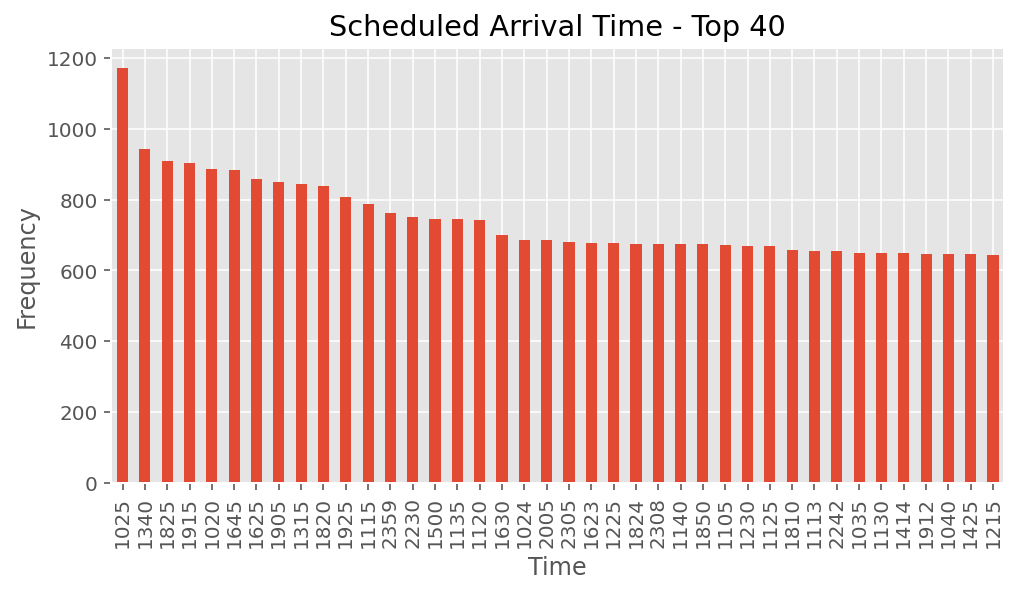

In [274]:
sched_arr_time=df['sched_arr_time'].value_counts().head(40)
#plot in a chart
#give it a title
sched_arr_time.plot.bar(title='Scheduled Arrival Time - Top 40')
#assign axis labels
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

10:25 AM far exceeds other scheduled arrival time frequencies. 

#### 8. Carrier

In [275]:
#summary statistics
df['carrier'].describe()

count     303748
unique        12
top           UA
freq       63406
Name: carrier, dtype: object

There are no null values in the carrier column. There are 12 unique carriers in this data set. The most frequent airline is UA at 63,406.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

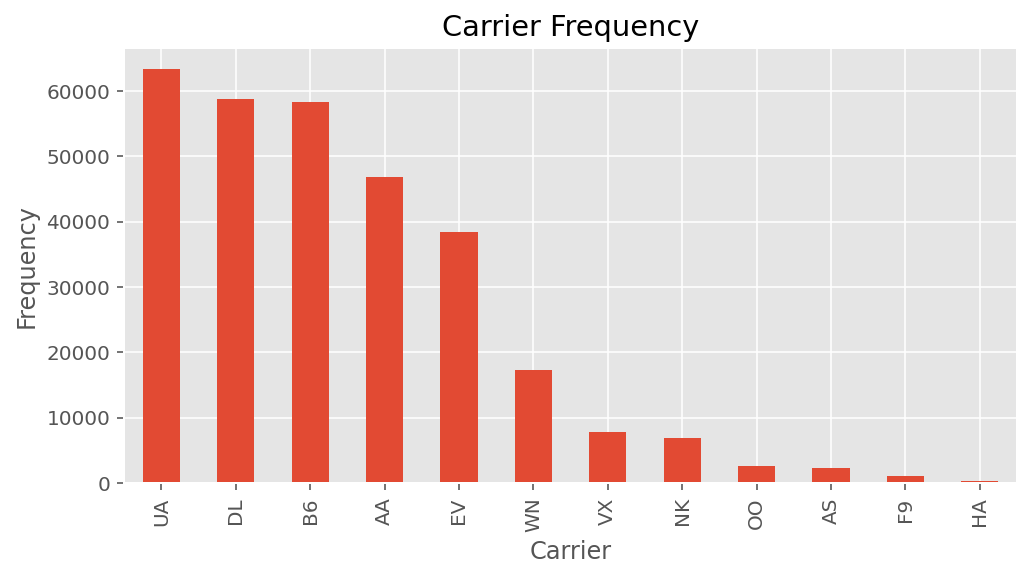

In [276]:
#counting the frequecies
count_carr=df['carrier'].value_counts()
#plot in a bar chart
#give it a title
count_carr.plot.bar(title='Carrier Frequency')
#assign axis labels
plt.xlabel("Carrier")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

The least frequent airline carriers are WN (South West), VX (Virgin America), NK (Spirit Wings), OO (Sky West), AS (Alaska), F9 (Frontier Airlines), and HA (Hawaiian).

The most frequent are UA (United), DL (Delta), B6 (Jet Blue), AA (American), and EV (Express Jet).

#### 9. Flight

With a few exceptions, flights are usually numbered based on their direction of travel. For example, north and eastbound flights are assigned even numbers, while south and westbound flights are numbered odd. This means they are categorical, even though they are assigned numbers. 

In [277]:
#summary statistics
df['flight'].describe()

count    303748.000000
mean       1698.710668
std        1461.222263
min           1.000000
25%         519.000000
50%        1345.000000
75%        2238.000000
max        6988.000000
Name: flight, dtype: float64

In [278]:
df['flight'].value_counts()

211     874
23      856
1161    854
1415    845
1105    824
       ... 
1316      1
352       1
6283      1
6499      1
2871      1
Name: flight, Length: 3383, dtype: int64

There are no null values in the flight column. There are 3,383 unique flight numbers in this dataset, with flight 211 appearing 874 times. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

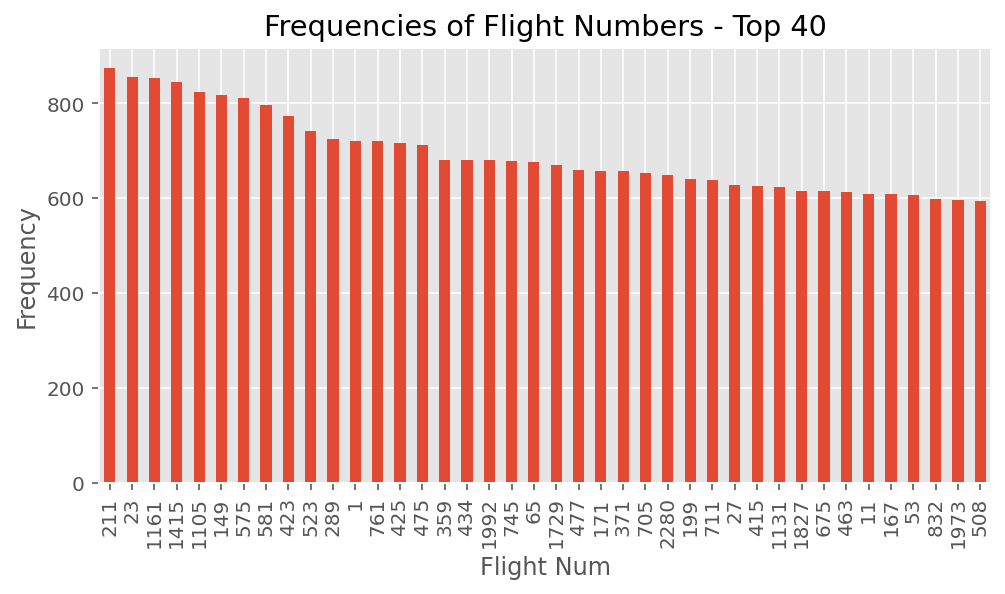

In [279]:
#counting the frequecies
count_f=df['flight'].value_counts().head(40)
#plot in a bar chart
#give it a title
count_f.plot.bar(title='Frequencies of Flight Numbers - Top 40')
#assign axis labels
plt.xlabel("Flight Num")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

#### 10. Tail Number

In [280]:
#summary statistics
df['tailnum'].describe()

count     302757
unique      4126
top       N751EV
freq         471
Name: tailnum, dtype: object

In [281]:
#count nulls ('True' values)
df['tailnum'].isna().value_counts()

False    302757
True        991
Name: tailnum, dtype: int64

There are 991 missing values from the tail number column. The most frequent tail number is N751EV at 471 appearances in the data set. There are 4,126 unique tail numbers. We will graph the top 40.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

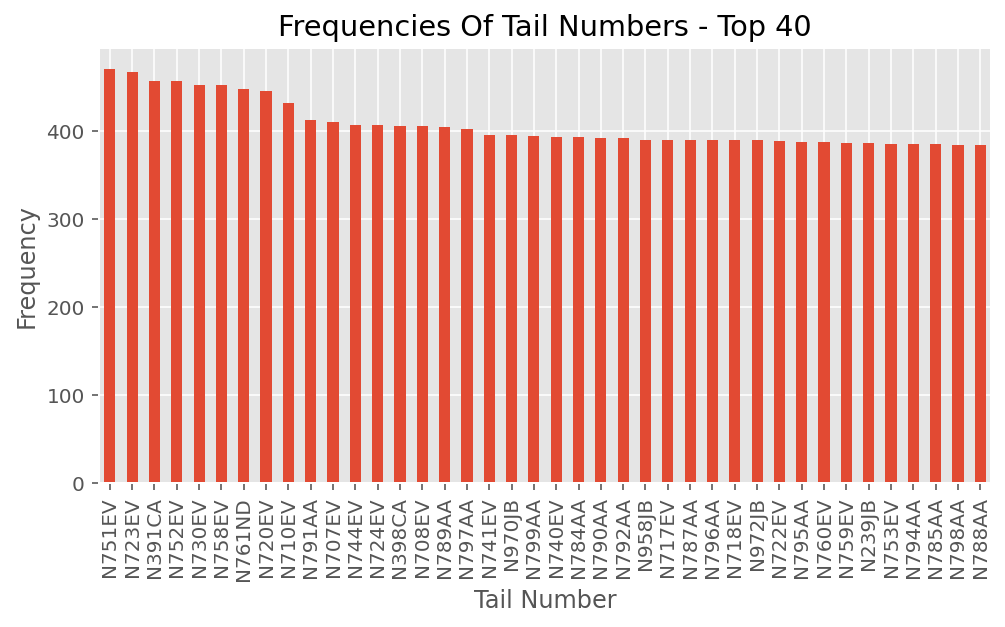

In [282]:
#counting the frequecies
count_tn=df['tailnum'].value_counts().head(40)
#plot in a chart
#give it a title
count_tn.plot.bar(title='Frequencies Of Tail Numbers - Top 40')
#assign axis labels
plt.xlabel("Tail Number")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Many of them are near the same frequency. 

#### 11. Origin 

In [283]:
#summary statistics
df['origin'].describe()

count     303748
unique         3
top          EWR
freq      115968
Name: origin, dtype: object

There are no null values in the origin column. There are just 3 NY airports for the origin - EWR, JFK, and LGA. The most frequent one here is EWR at 115,968 times. 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

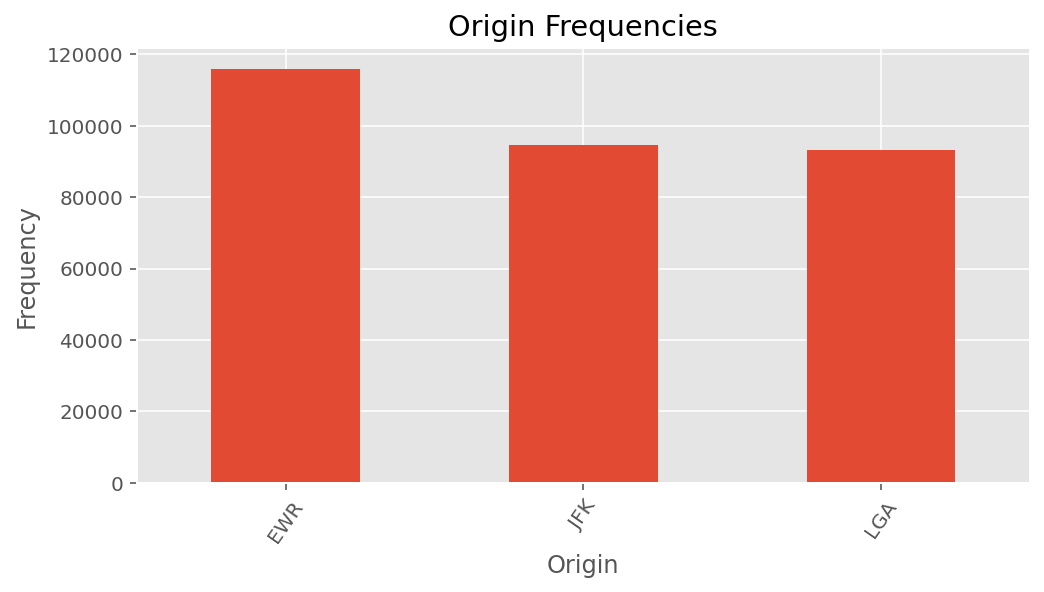

In [284]:
#counting the frequecies
count_or=df['origin'].value_counts()
#plot in a chart
#give it a title
count_or.plot.bar(title='Origin Frequencies')
#assign axis labels
plt.xlabel("Origin")
plt.ylabel("Frequency")
plt.xticks(rotation=55, horizontalalignment="center")

EWR is the most frequent origin, but not by far. JFK and LGA appear a similar amount of times. 

#### 12. Destination

In [285]:
#summary statistics
df['dest'].describe()

count     303748
unique       109
top          LAX
freq       18044
Name: dest, dtype: object

There are no null values in the destination column. There are 109 unique destinations, LAX being the most frequent one in the data set with 18,044 times. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

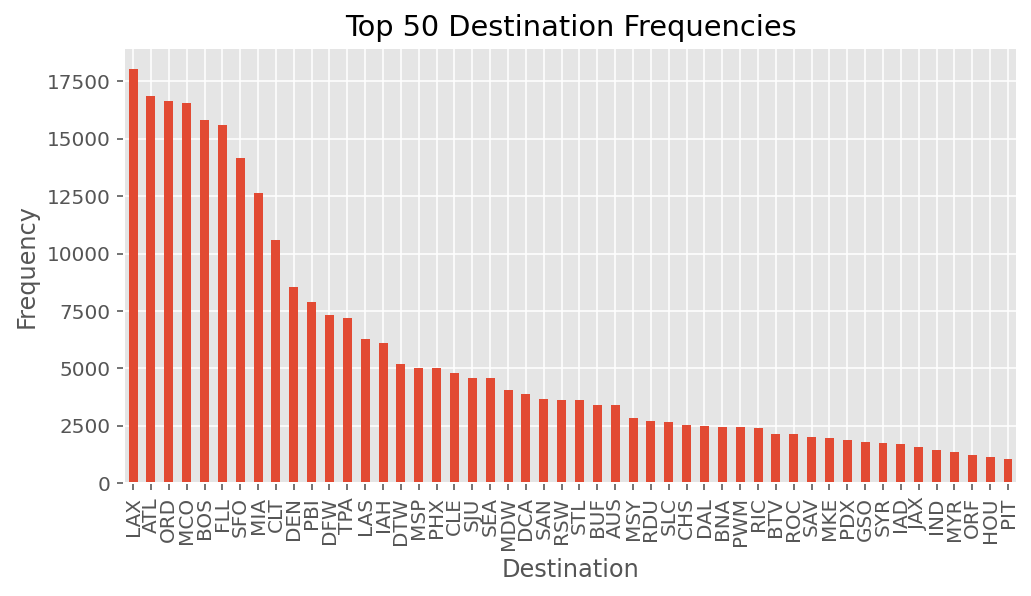

In [286]:
#counting the frequecies
count_dest=df['dest'].value_counts().head(50)
#plot in a chart
#give it a title
count_dest.plot.bar(title='Top 50 Destination Frequencies')
#assign axis labels
plt.xlabel("Destination")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Frequency drop off begins around DEN's frequency (the 10th most frequent airport destination). 

#### 13. Air Time

In [287]:
#summary statistics
df['air_time'].describe()

count    294896.000000
mean        164.489427
std          97.872896
min          20.000000
25%          99.000000
50%         139.000000
75%         211.000000
max         712.000000
Name: air_time, dtype: float64

In [288]:
#count nulls ('True' values)
df['air_time'].isna().value_counts()

False    294896
True       8852
Name: air_time, dtype: int64

The are 8,852 missing air times. Of the non missing values, the minimum air time is 20 minutes and the maximum time is 712 minutes (approx. 12 hours). The data has a standard deviation of 97.87 minutes and a mean of of 164.50 minutes. 

In [289]:
#import packages
import seaborn as sns
from scipy.stats import probplot
from pandas.plotting import scatter_matrix
from IPython.display import Markdown, display
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant
import statsmodels.formula.api as smf

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

def compare(col_name, title, xlabel, ylabel):
    """
    Plot three plots.
    """
    
    fig = plt.figure(figsize=(16,4))
    
    plt.subplot(1, 3, 1)
    plt.xlabel(xlabel)
    sns.distplot(df[col_name], kde=False);
    plt.title(title);
    plt.xlabel(xlabel)

    plt.subplot(1, 3, 2)
    probplot(df[col_name], plot = plt);
    string = title + " prob. plot"
    plt.title(string);

    plt.subplot(1, 3, 3)
    plt.ylabel(ylabel)
    df.boxplot(column = col_name);
    plt.title(title);

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


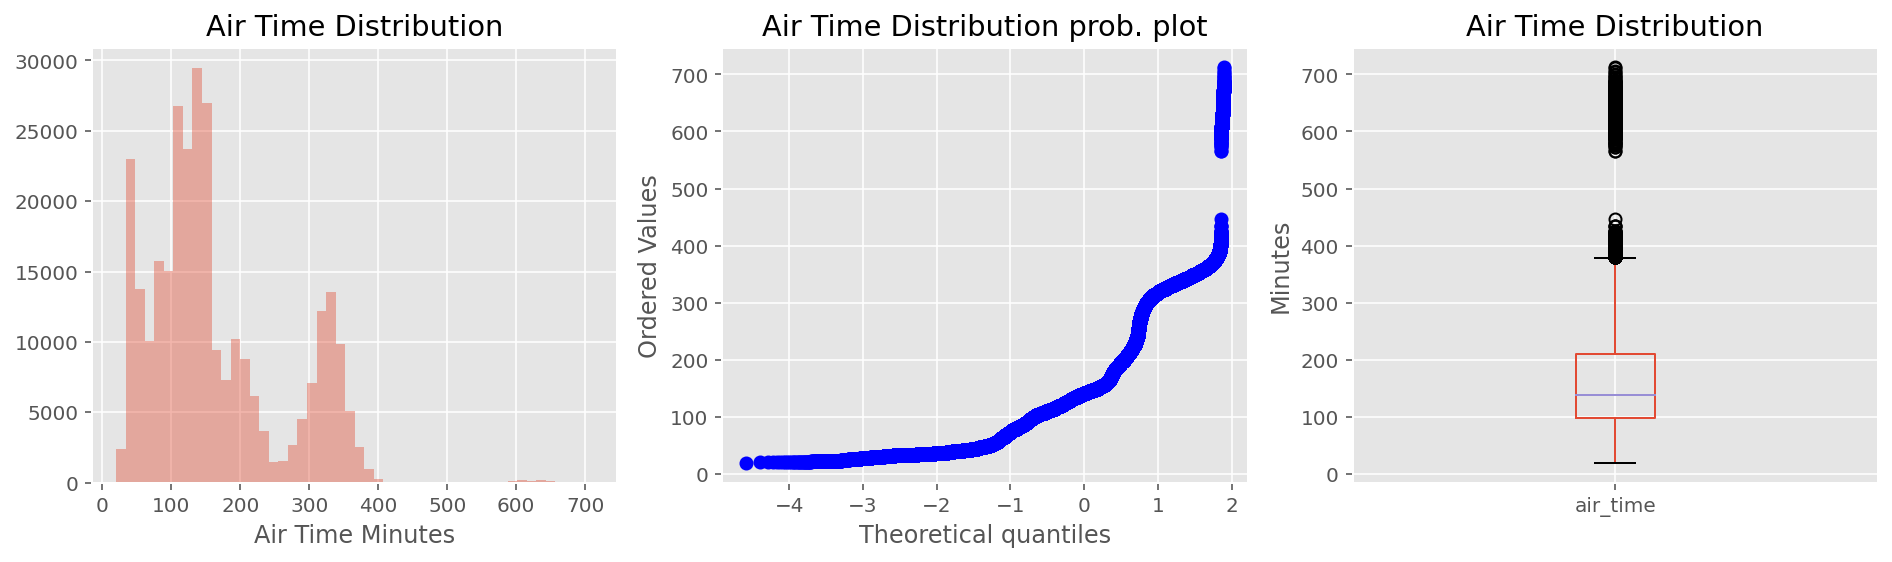

In [290]:
compare("air_time", "Air Time Distribution", 'Air Time Minutes', 'Minutes')

The data is skewed right, with many outliers. Many of the non outlier values lay between the 100 and 200 minute mark of air time.

#### 14. Distance 

In [291]:
#summary statistics
df['distance'].describe()

count    303748.000000
mean       1154.050051
std         760.439813
min          93.000000
25%         636.000000
50%        1005.000000
75%        1598.000000
max        4983.000000
Name: distance, dtype: float64

The are no missing distance values. The longest distance is 4,983 miles and the shortest distance is 93 miles. The data has a standard deviation of 760.44 miles and a mean of 1,154.05 miles. 

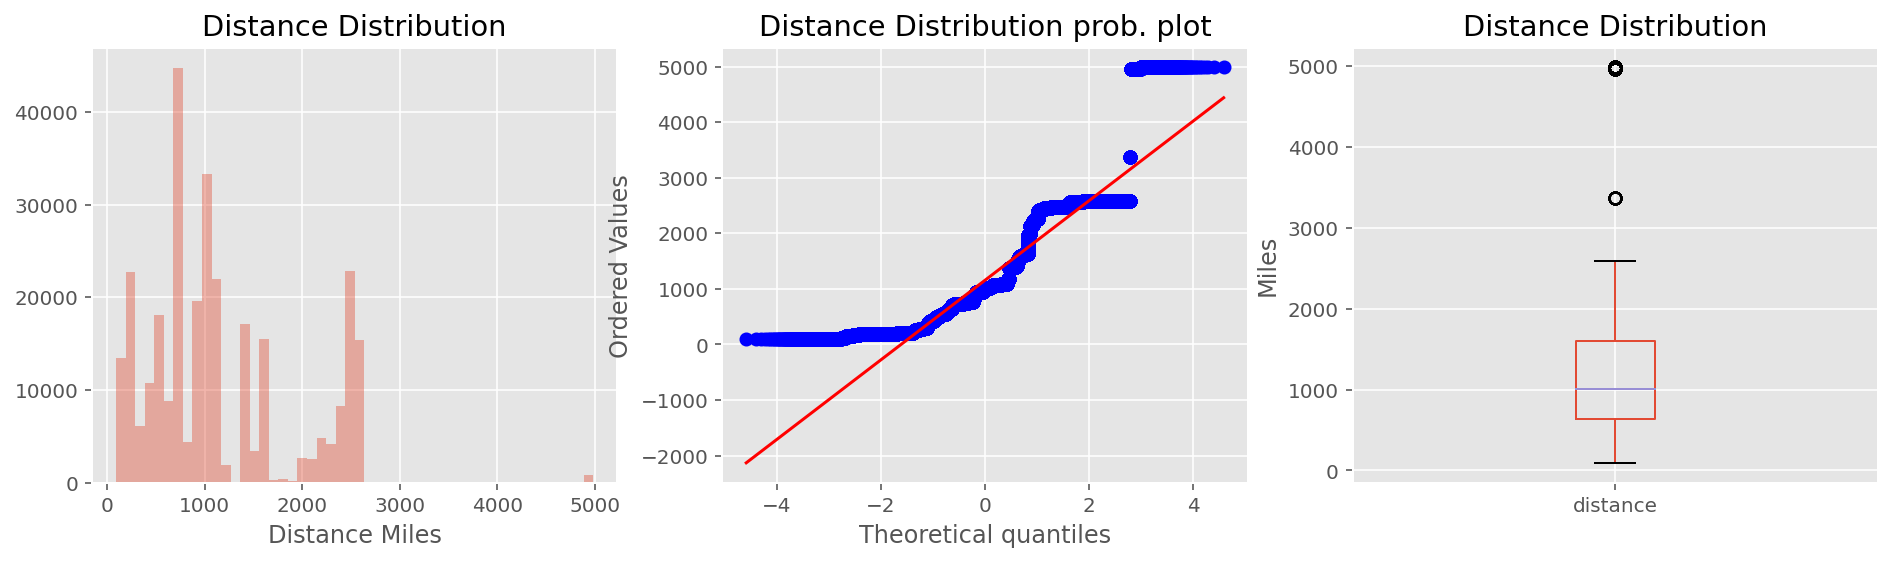

In [292]:
compare("distance", "Distance Distribution", 'Distance Miles', 'Miles')

Data appears to be decently normal, with a few major outliers near the 5,000 mile mark. 

#### 15. Departure Delay

In [293]:
#summary statistics
df['dep_delay'].describe()

count    295934.000000
mean         15.187424
std          52.040383
min         -84.000000
25%          -6.000000
50%          -2.000000
75%          12.000000
max        1548.000000
Name: dep_delay, dtype: float64

In [294]:
#count nulls ('True' values)
df['dep_delay'].isna().value_counts()

False    295934
True       7814
Name: dep_delay, dtype: int64

There are 7,814 missing values for departure delay. Of the non-missing values, the minimum "delay" is -84 minutes, meaning the flight departed 84 minutes before it was scheduled to. The maximum delay was 1,548 minutes. The data has a standard deviation of 52.04 delayed minutes and a mean of 15.19 delayed minutes. 

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


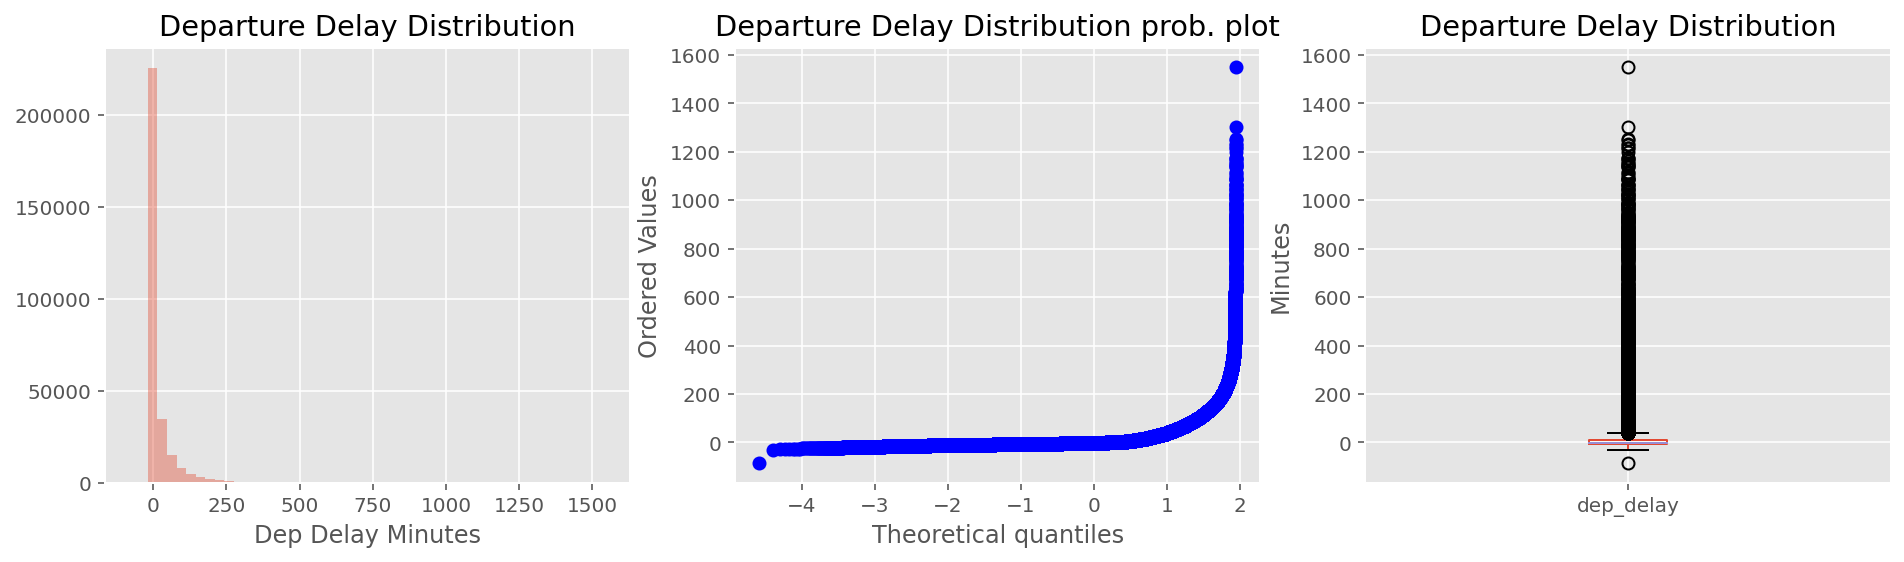

In [295]:
compare("dep_delay", "Departure Delay Distribution", 'Dep Delay Minutes', 'Minutes')

Most of the departure delays fall anywhere between -85 minutes and 85 minutes. However, there are a number of delays that have a higher value between 85 and 245 minutes.

#### 16. Arrival Delay

In [296]:
#summary statistics 
df['arr_delay'].describe()

count    294896.000000
mean          7.104023
std          55.323259
min         -98.000000
25%         -20.000000
50%          -7.000000
75%          13.000000
max        1589.000000
Name: arr_delay, dtype: float64

In [297]:
#count nulls ('True' values)
df['arr_delay'].isna().value_counts()

False    294896
True       8852
Name: arr_delay, dtype: int64

There are 8,852 values missing for the arrival delay column. Of the non-missing values, the minimum arrival "delay" is -98 minutes, meaning the flight arrived at the destination 98 minutes ahead of schedule. The maximum delay is 1,589 minutes. The data has a standard deviation of 55.32 arrival delay minutes and a mean of 7.10 arrival delay minutes. 

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


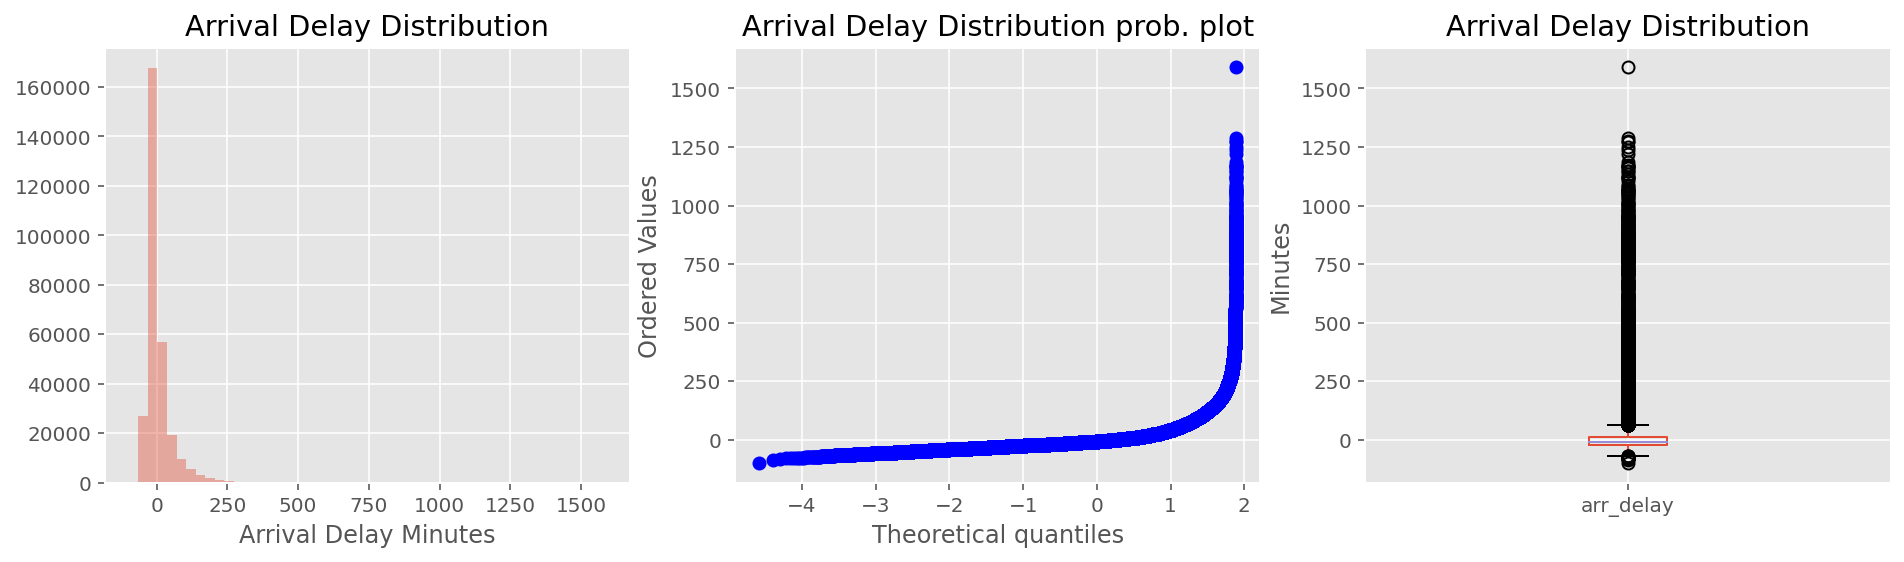

In [298]:
compare("arr_delay", "Arrival Delay Distribution", 'Arrival Delay Minutes', 'Minutes')

Most arrival delay values appear between -98 minutes and 75 minutes. Many arrival delays still fall into higher delay minutes between 75 and 250. 

In [300]:
#show df
df.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2017,10,1,27,2114,193.0,317,15,182.0,UA,1537,N54711,EWR,MIA,148.0,1085.0,21.0,14.0,2017-10-01 21:00:00
1,2017,10,1,519,525,-6.0,741,759,-18.0,UA,1161,N37287,EWR,IAH,183.0,1400.0,5.0,25.0,2017-10-01 05:00:00


#### The last 3 columns - Hour, Minute, and Time_Hour - are just repeats of the times and dates we already explored.